Philosopher 0 is thinking.
Philosopher 1 is thinking.
Philosopher 2 is thinking.
Philosopher 3 is thinking.
Philosopher 4 is thinking.
Philosopher 2 picked up fork 2.
Philosopher 2 picked up fork 3.
Philosopher 2 is eating.
Philosopher 4 picked up fork 4.
Philosopher 4 picked up fork 0.
Philosopher 4 is eating.
Philosopher 2 put down fork 2.
Philosopher 1 picked up fork 1.
Philosopher 1 picked up fork 2.
Philosopher 1 is eating.
Philosopher 4 put down fork 4.
Philosopher 3 picked up fork 3.
Philosopher 3 picked up fork 4.
Philosopher 3 is eating.
Philosopher 1 put down fork 1.
Philosopher 0 picked up fork 0.
Philosopher 0 picked up fork 1.
Philosopher 0 is eating.
Philosopher 3 put down fork 3.
Philosopher 0 put down fork 0.
No deadlock detected.


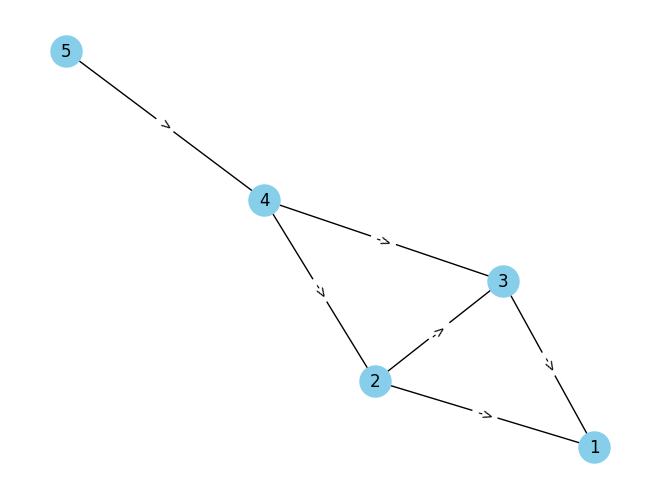

In [3]:
import threading
import time
import random
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

NUM_PHILOSOPHERS = 5
MAX_EATING_TIME = 1

# Create a list of mutex (fork) objects for each fork
forks = [threading.Lock() for _ in range(NUM_PHILOSOPHERS)]

# Mutex for synchronized printing
print_mutex = threading.Lock()

# Function to print with synchronization
def synchronized_print(message):
    with print_mutex:
        print(message)

# Define the philosopher class
class Philosopher(threading.Thread):
    def __init__(self, philosopher_id):
        super().__init__()
        self.philosopher_id = philosopher_id

    def run(self):
        for _ in range(MAX_EATING_TIME):
            self.think()
            self.pick_forks()
            self.eat()
            self.put_forks()

    def think(self):
        synchronized_print(f'Philosopher {self.philosopher_id} is thinking.')
        time.sleep(random.uniform(0, 1))

    def pick_forks(self):
        left_fork = self.philosopher_id 
        right_fork = (self.philosopher_id + 1) % NUM_PHILOSOPHERS
        forks[left_fork].acquire()
        forks[right_fork].acquire()

        synchronized_print(f'Philosopher {self.philosopher_id} picked up fork {left_fork}.')
        synchronized_print(f'Philosopher {self.philosopher_id} picked up fork {right_fork}.')
        deadlock_detector.add_edge(left_fork, self.philosopher_id)
        deadlock_detector.add_edge(right_fork, self.philosopher_id)
        deadlock_detector.record_state(self.philosopher_id, f'Picked up fork {left_fork}')
        deadlock_detector.record_state(self.philosopher_id, f'Picked up fork {right_fork}')
      

    def eat(self):
        synchronized_print(f'Philosopher {self.philosopher_id} is eating.')
        time.sleep(random.uniform(0, 1))

    def put_forks(self):
        left_fork = self.philosopher_id
        right_fork = (self.philosopher_id + 1) % NUM_PHILOSOPHERS
        deadlock_detector.add_edge(left_fork, self.philosopher_id)

        synchronized_print(f'Philosopher {self.philosopher_id} put down fork {left_fork}.')
        forks[left_fork].release()
        forks[right_fork].release()

# Custom deadlock detection using Tarjan's algorithm
class DeadlockDetector:
    def __init__(self):
        self.graph = defaultdict(list)
        self.stack = []
        self.visited = set()
        self.in_stack = set()
        self.cycle_detected = False
        self.states = []

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def detect_deadlock(self):
        for i in range(NUM_PHILOSOPHERS):
            if i not in self.visited:
                self.dfs(i)

        return self.cycle_detected

    def dfs(self, u):
        self.visited.add(u)
        self.in_stack.add(u)
        self.stack.append(u)

        for v in self.graph[u]:
            if v not in self.visited:
                self.dfs(v)
            elif v in self.in_stack:
                self.cycle_detected = False
                return

        self.in_stack.remove(u)
        self.stack.pop()

    def record_state(self, philosopher_id, state):
        self.states.append((philosopher_id, state))
        
    def plot_no_deadlock_graph(self):
        G = nx.Graph()
        nodes = [1,2,3,4,5]
        G.add_nodes_from(nodes)
        edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]
        G.add_edges_from(edges)
        
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(1, 2): '->', (1, 3): '->', (2, 3): '->', (2, 4): '->', (3, 4): '->', (4, 5): '>'})
        plt.show()
        

    def plot_deadlock_graph(self):
        G = nx.DiGraph()
        for u in self.graph:
            for v in self.graph[u]:
                  if u != v: 
                        G.add_edge(u, v)
                        
                

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=12, font_color="black", arrows=True)
        plt.title("Deadlock Graph")
        plt.show()

    def display_states(self):
        print("\nStates during the deadlock:")
        for philosopher_id, state in self.states:
            print(f"Philosopher {philosopher_id}: {state}")

    
            


# Create and start philosopher threads
philosophers = [Philosopher(i) for i in range(NUM_PHILOSOPHERS)]
deadlock_detector = DeadlockDetector()




for philosopher in philosophers:
    philosopher.start()

for philosopher in philosophers:
    philosopher.join()

# Detect deadlock and plot the deadlock graph
if deadlock_detector.detect_deadlock():
    synchronized_print("Deadlock detected!")
    deadlock_detector.plot_deadlock_graph()
    deadlock_detector.display_states()
else:
    synchronized_print("No deadlock detected.")
    deadlock_detector.plot_no_deadlock_graph()
    